# Data cleaning
## Import original dataset

In [1]:
import pandas as pd

kidney_disease = pd.read_csv(r'Data/original_dataset.csv')
display(kidney_disease)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


## Rename columns

In [2]:
kidney_disease.columns = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'classification']

## Type standardization
### String numerical columns --> numerical values

In [3]:
str_num_cols = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
for col in str_num_cols:
    kidney_disease[col]=pd.to_numeric(kidney_disease[col], errors='coerce')

### String columns cleaning
#### User controlled way

In [4]:

string_columns = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'classification']
'''
for column in string_columns:
    distinct_values =  kidney_disease[column].dropna().unique()
    first_check = True
    print(distinct_values)
    while len(distinct_values) > 2 :
        if first_check:
            print('\n' + column + ':')
            first_check = False
        else:
            print('Column not yet boolean, please retry\n')
        for value in distinct_values:
            is_replaced = input("\t- '" + value + "' : replace? (y/N)")
            if is_replaced == 'y':
                replacement = input('\t  replace by: ')
                kidney_disease[column] = kidney_disease[column].replace(value, replacement)
        distinct_values =  kidney_disease[column].dropna().unique()
print('\nBoolean columns now all contain only 2 distinct not-null values')
'''

'\nfor column in string_columns:\n    distinct_values =  kidney_disease[column].dropna().unique()\n    first_check = True\n    print(distinct_values)\n    while len(distinct_values) > 2 :\n        if first_check:\n            print(\'\n\' + column + \':\')\n            first_check = False\n        else:\n            print(\'Column not yet boolean, please retry\n\')\n        for value in distinct_values:\n            is_replaced = input("\t- \'" + value + "\' : replace? (y/N)")\n            if is_replaced == \'y\':\n                replacement = input(\'\t  replace by: \')\n                kidney_disease[column] = kidney_disease[column].replace(value, replacement)\n        distinct_values =  kidney_disease[column].dropna().unique()\nprint(\'\nBoolean columns now all contain only 2 distinct not-null values\')\n'

#### Iterative way

In [5]:
kidney_disease['classification'] =  kidney_disease['classification'].replace(['ckd\t'], ['ckd'])
kidney_disease['coronary_artery_disease'] =  kidney_disease['coronary_artery_disease'].replace(['\tno'], ['no'])
kidney_disease['diabetes_mellitus'] =  kidney_disease['diabetes_mellitus'].replace([' yes','\tno','\tyes'], ['yes','no','yes'])

### String encoding
#### User controlled way
This way allows to keep some integrity in the data. For example, if yes is encoded as 1 in a column, it will also be encoded as 1 in another column, which we can't make sure of with automatic encoding.
As all string columns in the dataset are boolean columns, values can here be replaced by True / False.

In [6]:
boolean_columns = string_columns
for column in [col for col in boolean_columns if col != "classification"]:
    distinct_values =  kidney_disease[column].dropna().unique()
    order = True
    print(column + ' : ' + str(distinct_values) + ' --> ' + str([order, not order]))
    is_reversed = input("Confirm order or reverse ? (C/r)")
    if is_reversed == 'r':
        order = not order
    kidney_disease[column] = kidney_disease[column].replace(distinct_values[0], order)
    print('\t- ' + distinct_values[0] + ' --> ' + str(order))
    kidney_disease[column] = kidney_disease[column].replace(distinct_values[1], not order)
    print('\t- ' + distinct_values[1] + ' --> ' + str(not order) + '\n')

red_blood_cells : ['normal' 'abnormal'] --> [True, False]
	- normal --> True
	- abnormal --> False

pus_cell : ['normal' 'abnormal'] --> [True, False]
	- normal --> True
	- abnormal --> False

pus_cell_clumps : ['notpresent' 'present'] --> [True, False]
	- notpresent --> False
	- present --> True

bacteria : ['notpresent' 'present'] --> [True, False]
	- notpresent --> False
	- present --> True

hypertension : ['yes' 'no'] --> [True, False]
	- yes --> True
	- no --> False

diabetes_mellitus : ['yes' 'no'] --> [True, False]
	- yes --> True
	- no --> False

coronary_artery_disease : ['no' 'yes'] --> [True, False]
	- no --> False
	- yes --> True

appetite : ['good' 'poor'] --> [True, False]
	- good --> True
	- poor --> False

peda_edema : ['no' 'yes'] --> [True, False]
	- no --> False
	- yes --> True

aanemia : ['no' 'yes'] --> [True, False]
	- no --> False
	- yes --> True



#### Automatic way

In [ ]:
# TODO Encode all of the strings with LabelEncoder

## Null values handling
### Split columns into continuous and discrete variables

In [9]:
continuous_cols =[]
discrete_cols=[]
for col in kidney_disease:
    if(kidney_disease[col].dtype==object):
        discrete_cols.append(col)
    else:
        continuous_cols.append(col)

print("Continuous Columns:")
for col in continuous_cols:
    print('  - '+col) 
print("\nDiscrete Columns:")
for col in discrete_cols:
    print('  - '+col) 

Continuous Columns:
  - id
  - age
  - blood_pressure
  - specific_gravity
  - albumin
  - sugar
  - blood_glucose_random
  - blood_urea
  - serum_creatinine
  - sodium
  - potassium
  - hemoglobin
  - packed_cell_volume
  - white_blood_cell_count
  - red_blood_cell_count

Discrete Columns:
  - red_blood_cells
  - pus_cell
  - pus_cell_clumps
  - bacteria
  - hypertension
  - diabetes_mellitus
  - coronary_artery_disease
  - appetite
  - peda_edema
  - aanemia
  - classification


### Continuous variables

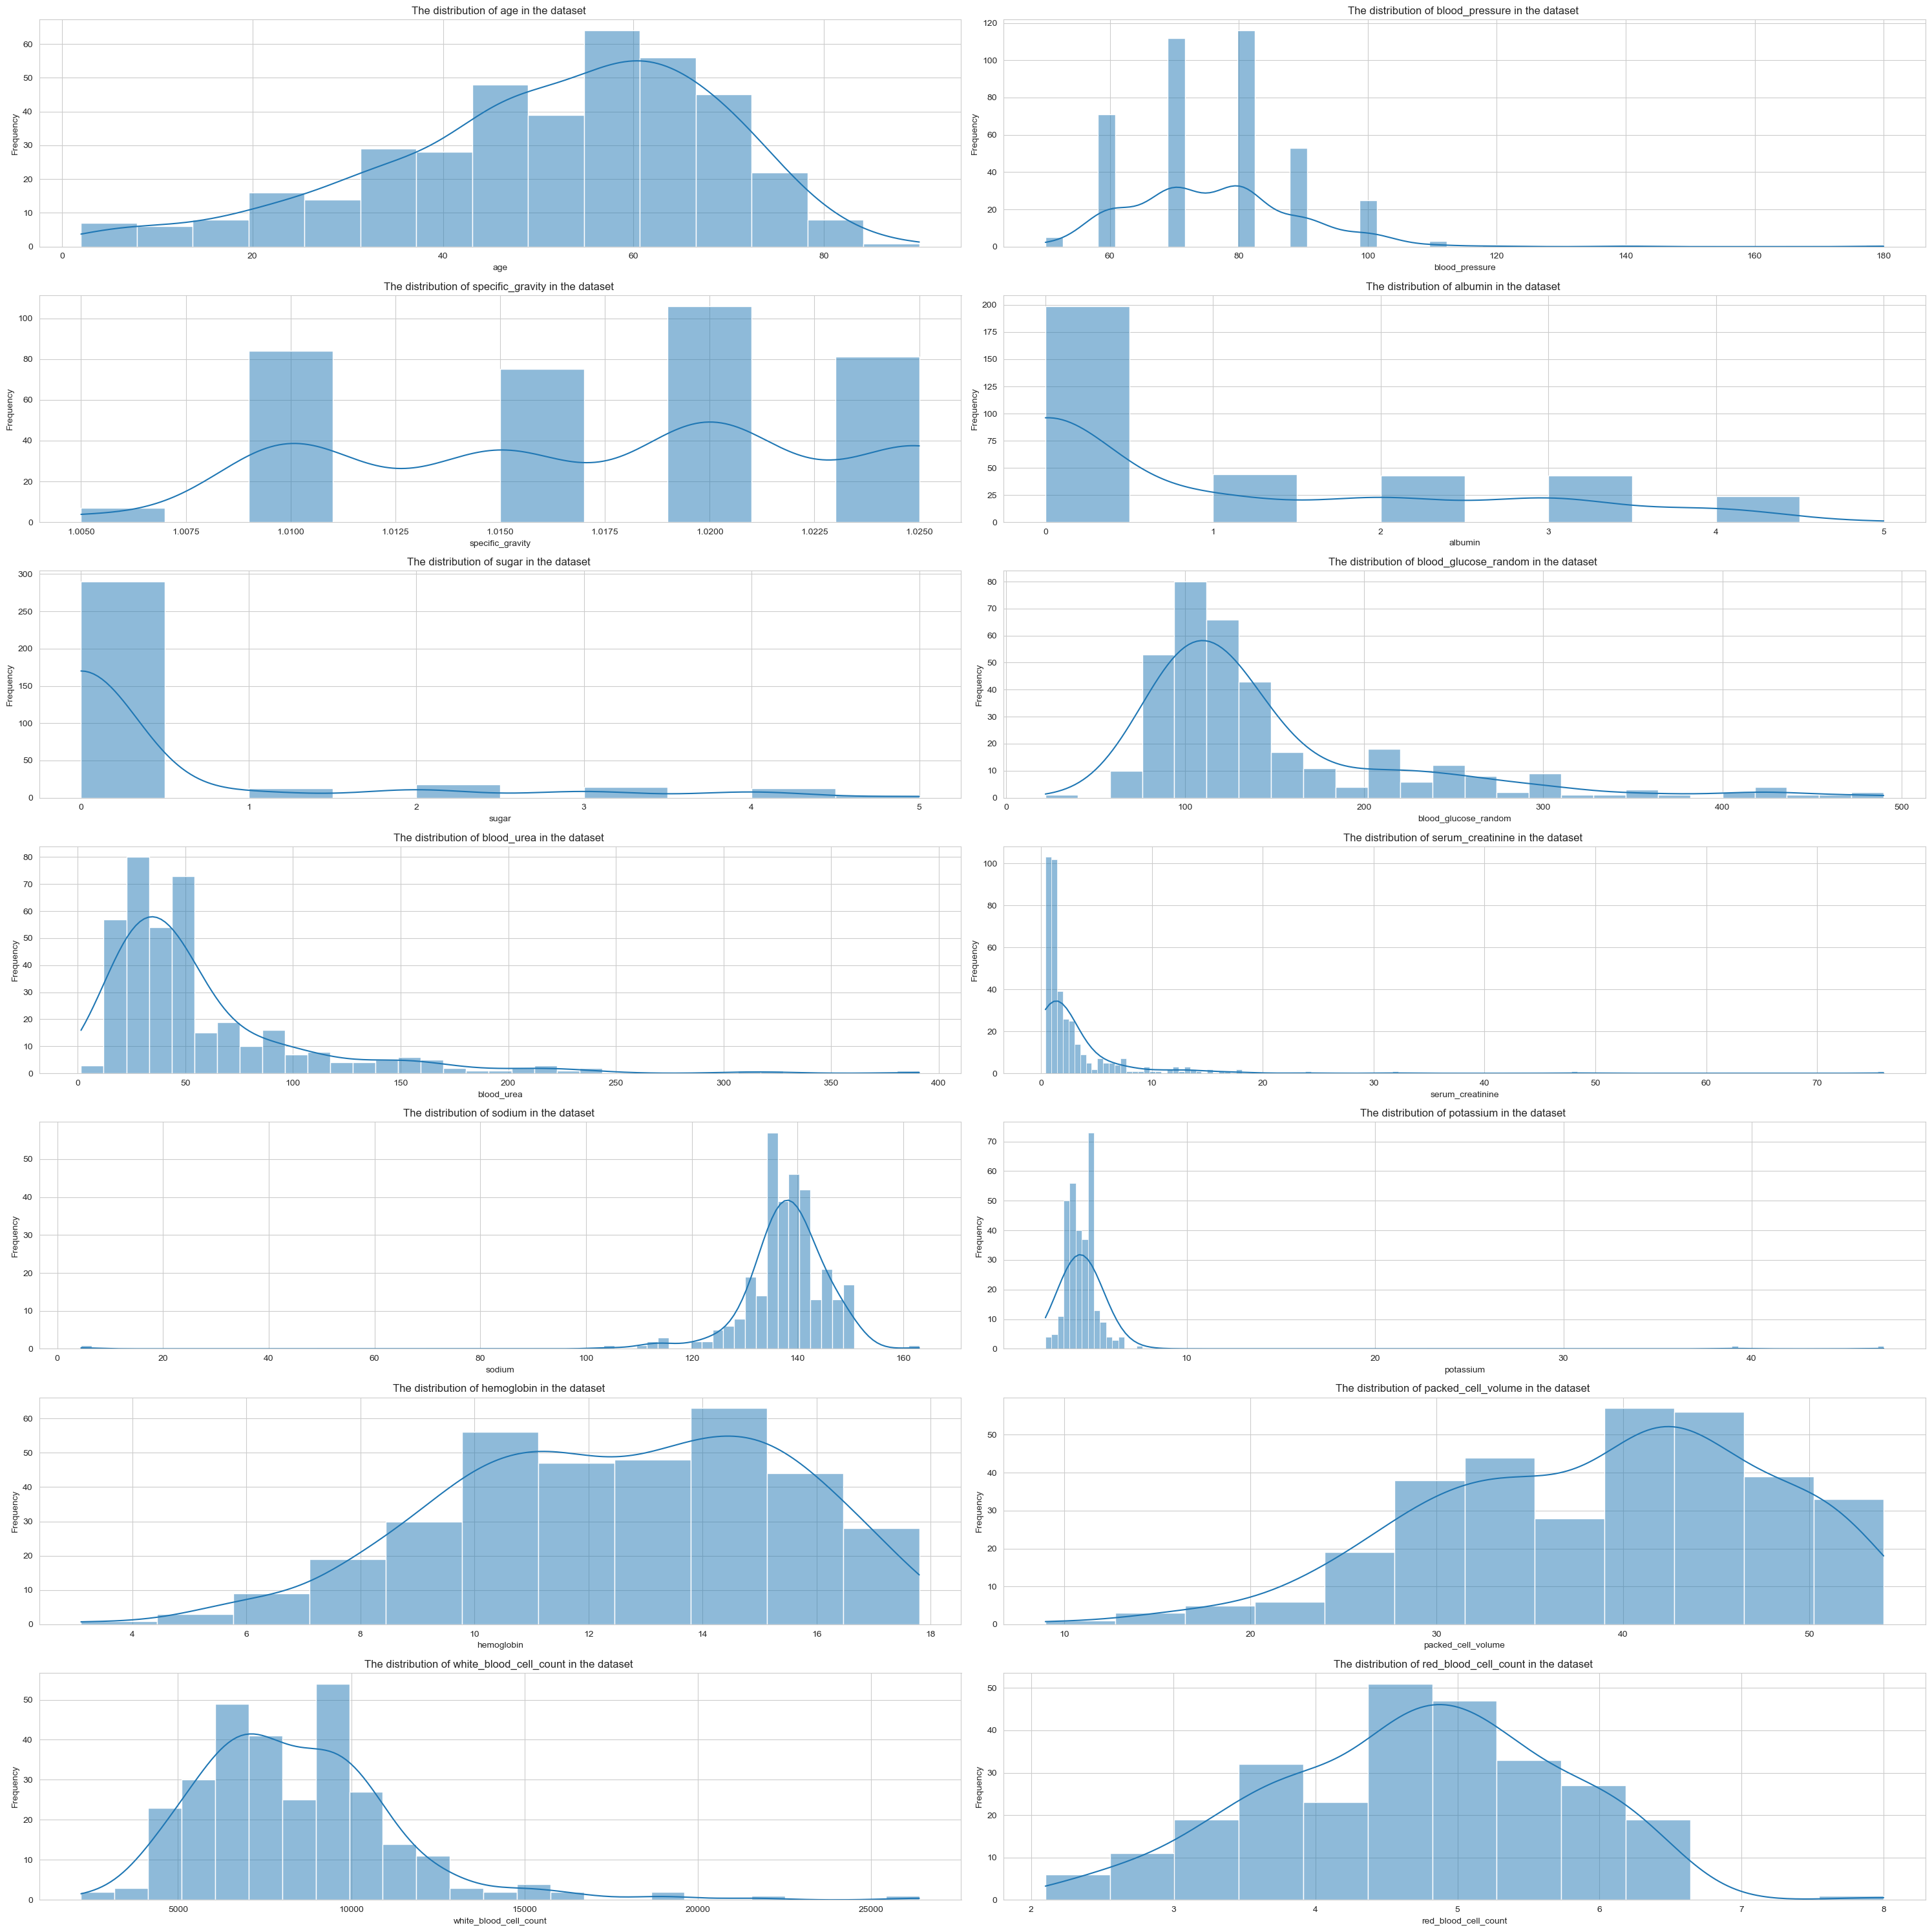

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(7, 2, figsize=(30, 30))

for index,col in enumerate(continuous_cols):

    sns.histplot(data=kidney_disease[col],ax=axs[index//2 , index%2] ,kde=True)

    # set the title and axis labels
    axs[index//2 , index%2].set_title('The distribution of '+ col +' in the dataset ')
    axs[index//2 , index%2].set_xlabel(col)
    axs[index//2 , index%2].set_ylabel('Frequency')
    

plt.tight_layout()
plt.show()

**for features with few null values (<10%) we replaced by the mode**
- Mode is preferable to the mean in our case because a lot of variables have big outlier

In [ ]:
for col in continuous_cols:
    if((kidney_disease[col].isna().sum() / len(kidney_disease))*100 <=10):
        mode=kidney_disease[col].mode()[0]
        kidney_disease[col] = kidney_disease[col].fillna(mode)

In [ ]:
kidney_disease[continuous_cols].isnull().sum()

age                         0
blood_pressure              0
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                  0
serum_creatinine            0
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

### Discret varaible

for features with not a lot of null value we replaced them by the big categorie (less and equal then 10%)

### Null rows verification

In [ ]:
(kidney_disease.isnull().sum() / len(kidney_disease))*100

age                         0.00
blood_pressure              0.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  0.00
serum_creatinine            0.00
sodium                     21.75
potassium                  22.00
hemoglobin                 13.00
packed_cell_volume         17.75
white_blood_cell_count     26.50
red_blood_cell_count       32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
peda_edema                  0.25
aanemia                     0.25
classification              0.00
dtype: float64

## Drop irrelevant columns

In [ ]:
# Delete the column id -> no need for the ID it will not improve the detection
useless_columns = ['id']
kidney_disease.drop(useless_columns, inplace=True, axis=1)

## Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

kidney_disease = scaler.fit_transform(kidney_disease)

## Save clean dataset into csv file

In [ ]:
kidney_disease.to_csv('Data/clean_dataset.csv', index=False)